# <span style="font-size: 20pt; font-family: Montserrat, sans-serif; color: rgb(92, 148, 206); background-color: rgb(255, 255, 255); font-weight: 700; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">9 to 5</span>

<span style="font-size: 10pt; font-family: &quot;Times New Roman&quot;; color: rgb(102, 102, 102); background-color: rgb(255, 255, 255); font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">For each question, I'll display the SQL query I used and make note of the answer.</span>

## <span style="font-size: 12pt; font-family: Montserrat, sans-serif; color: rgb(53, 74, 95); background-color: rgb(255, 255, 255); font-weight: 700; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">The Dataset</span>

<span style="font-size: 10pt; font-family: &quot;Times New Roman&quot;; color: rgb(102, 102, 102); background-color: rgb(255, 255, 255); font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">For this project, I will be using the Bureau of Labor Statistics (BLS) Current Employment Survey (CES) results which can be found on</span> [<span style="font-size: 10pt; font-family: &quot;Times New Roman&quot;; color: rgb(17, 85, 204); background-color: rgb(255, 255, 255); font-variant-east-asian: normal; text-decoration-line: underline; vertical-align: baseline; white-space: pre-wrap;">Kaggle</span>](https://www.kaggle.com/bls/employment)<span style="font-size: 10pt; font-family: &quot;Times New Roman&quot;; color: rgb(102, 102, 102); background-color: rgb(255, 255, 255); font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">.</span>

## <span style="font-size: 12pt; font-family: Montserrat, sans-serif; color: rgb(53, 74, 95); background-color: rgb(255, 255, 255); font-weight: 700; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">Business Issue</span>

<span style="font-size: 10pt; font-family: &quot;Times New Roman&quot;; color: rgb(102, 102, 102); background-color: rgb(255, 255, 255); font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">Situation: You are working for the Bureau of Labor Statistics with the United States government and have been approached by your boss with an important meeting request. You have been asked by your supervisor to meet with Dolly Parton whose nonprofit is looking to shed light on the state of employment in the United States. As part of the 9 to 5 project, their research is focused on production and nonsupervisory employees and how those employees fare compared to all employees in the United States. While the data the BLS collects from the CES is publicly available, Dolly Parton and her colleagues need your assistance navigating the thousands of rows in each table in LaborStatisticsDB.</span>

## <span style="font-size: 12pt; font-family: Montserrat, sans-serif; color: rgb(53, 74, 95); background-color: rgb(255, 255, 255); font-weight: 700; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">About the Dataset</span>

<span style="font-size: 10pt; font-family: &quot;Times New Roman&quot;; color: rgb(102, 102, 102); background-color: rgb(255, 255, 255); font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">This dataset comes directly from the Bureau of Labor Statistics’ Current Employment Survey (CES). Here are some things you need to know:</span>

1. <span style="font-size: 10pt; background-color: rgb(255, 255, 255); font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">The industry table contains an NAICS code. This is different from the industry code. NAICS stands for North American Industry Classification System.</span>
    
2. <span style="font-size: 10pt; background-color: rgb(255, 255, 255); font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">Series ID is composed of multiple different codes. CES stands for Current Employment Survey, the name of the survey which collected the data. The industry code as specified by the BLS and the data type code as specified in the datatype table.</span>
    

<span style="font-size: 10pt; font-family: &quot;Times New Roman&quot;; color: rgb(102, 102, 102); background-color: rgb(255, 255, 255); font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">To start with, let’s get to know the database further.</span>


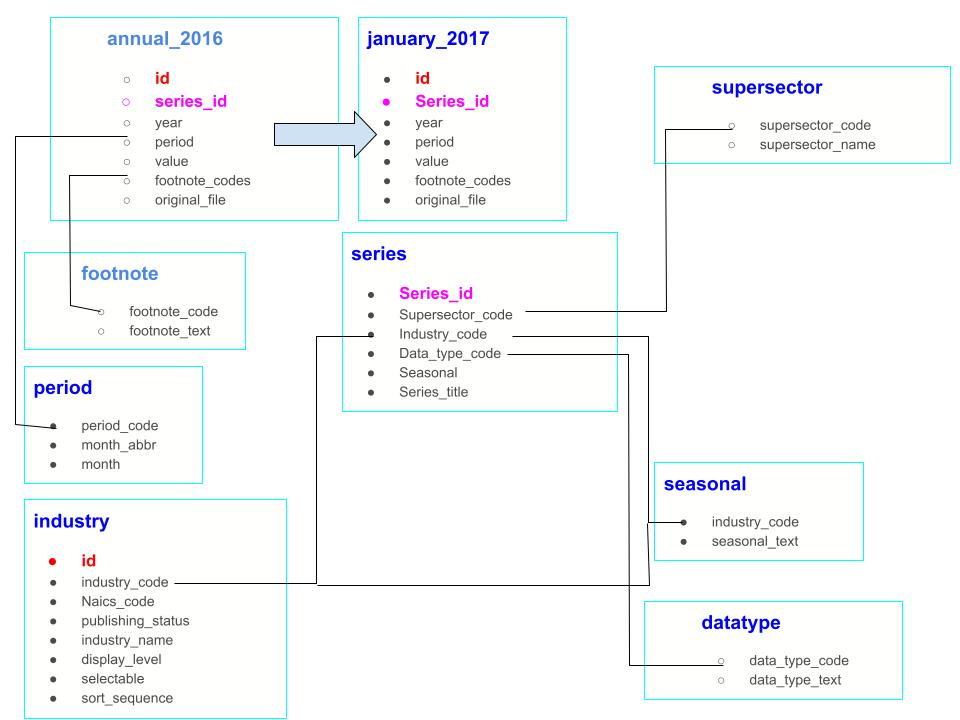  

```
9to5 Database model
```

In [1]:
-- Let's begin by looking around..
SELECT TOP(20) *
FROM series;
-- Whoa.. The series_id a weird collection of the other IDs! Looks like CES + industry_code + data_type_code.

(20 rows affected)

Total execution time: 00:00:00.094

series_id,supersector_code,industry_code,data_type_code,seasonal,series_title
CES0000000001,0,00000000,1,S,All employees
CES0000000010,0,00000000,10,S,Women employees
CES0000000025,0,00000000,25,S,All employees
CES0000000026,0,00000000,26,S,All employees
CES0500000001,5,05000000,1,S,All employees
CES0500000002,5,05000000,2,S,Average weekly hours of all employees
CES0500000003,5,05000000,3,S,Average hourly earnings of all employees
CES0500000006,5,05000000,6,S,Production and nonsupervisory employees
CES0500000007,5,05000000,7,S,Average weekly hours of production and nonsupervisory employees
CES0500000008,5,05000000,8,S,Average hourly earnings of production and nonsupervisory employees


1. <span style="background-color: rgb(255, 255, 255); color: rgb(102, 102, 102); font-family: Arvo, serif; font-size: 10pt; white-space: pre-wrap;">What is the datatype for women employees?</span>

<span style="font-size: 13.3333px; white-space: pre-wrap;">Answer: The datatype code is 10.</span>

In [2]:
SELECT data_type_code 
FROM datatype
WHERE data_type_text = 'WOMEN EMPLOYEES';

(1 row affected)

Total execution time: 00:00:00.068

data_type_code
10


3. <span style="background-color: rgb(255, 255, 255); font-size: 10pt; white-space: pre-wrap; color: rgb(102, 102, 102); font-family: Arvo, serif;">What is the series id for&nbsp; women employees in the commercial banking industry in the financial activities supersector?</span>

In [4]:
SELECT series_id
FROM series
WHERE industry_code = (
    SELECT industry_code
FROM industry
WHERE industry_name = 'commercial banking'
)
AND supersector_code = (
    SELECT supersector_code
FROM supersector
WHERE supersector_name = 'financial activities'
)
AND data_type_code = 10;

-- Uh-oh.. Is CEU a typo? Let's see if it occurs elsewhere.

(2 rows affected)

Total execution time: 00:00:00.111

series_id
CES5552211010
CEU5552211010


In [5]:
SELECT COUNT(series_id)
FROM series
WHERE series_id LIKE 'CEU%';
-- Ok, probably not a typo!
-- Oh, it's the seasonal code... U is for Unadjusted! 

(1 row affected)

Total execution time: 00:00:00.070

(No column name)
13350


## <span style="font-size: 12pt; font-family: Montserrat, sans-serif; color: rgb(53, 74, 95); background-color: rgb(255, 255, 255); font-weight: 700; font-variant-numeric: normal; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">Join in on the Fun</span>

<span style="font-size: 10pt; font-family: Arvo, serif; color: rgb(102, 102, 102); background-color: rgb(255, 255, 255); font-variant-numeric: normal; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">Time to start joining! You can choose the type of join you use, just make sure to make a&nbsp; note!</span>

1. <span style="background-color: rgb(255, 255, 255); font-size: 10pt; white-space: pre-wrap; color: rgb(102, 102, 102); font-family: Arvo, serif;">Join&nbsp; annual_2016 with series on series_id. We only want the data in the annual_2016 table to be included in the result.</span>

In [22]:
-- This will be a left join, to include all info from the annual_2016 table.
SELECT TOP(10) a.id, a.series_id, a.year, a.period, a.value, a.footnote_codes, a.original_file
FROM annual_2016 AS a
LEFT JOIN series AS s
ON a.series_id = s.series_id;

(10 rows affected)

Total execution time: 00:00:00.173

id,series_id,year,period,value,footnote_codes,original_file
0,CEU5500000007,2016,M13,36.9,NULL,ce.data.55c.FinancialActivities.ProductionEmployeeHoursAndEarnings.csv
1,CEU5500000008,2016,M13,26.11,NULL,ce.data.55c.FinancialActivities.ProductionEmployeeHoursAndEarnings.csv
2,CEU5500000030,2016,M13,962.73,NULL,ce.data.55c.FinancialActivities.ProductionEmployeeHoursAndEarnings.csv
3,CEU5500000031,2016,M13,411.29,NULL,ce.data.55c.FinancialActivities.ProductionEmployeeHoursAndEarnings.csv
4,CEU5500000032,2016,M13,11.15,NULL,ce.data.55c.FinancialActivities.ProductionEmployeeHoursAndEarnings.csv
5,CEU5500000034,2016,M13,111.6,NULL,ce.data.55c.FinancialActivities.ProductionEmployeeHoursAndEarnings.csv
6,CEU5500000035,2016,M13,179.2,NULL,ce.data.55c.FinancialActivities.ProductionEmployeeHoursAndEarnings.csv
7,CEU5500000081,2016,M13,236997,NULL,ce.data.55c.FinancialActivities.ProductionEmployeeHoursAndEarnings.csv
8,CEU5500000082,2016,M13,6189003,NULL,ce.data.55c.FinancialActivities.ProductionEmployeeHoursAndEarnings.csv
9,CEU5552200007,2016,M13,37.3,NULL,ce.data.55c.FinancialActivities.ProductionEmployeeHoursAndEarnings.csv


2. <span style="background-color: rgb(255, 255, 255); font-size: 10pt; white-space: pre-wrap; color: rgb(102, 102, 102); font-family: Arvo, serif;">Join series and datatype on data_type_code</span>

In [24]:
-- This will be an inner join.
SELECT TOP(10) s.series_title, s.data_type_code, d.data_type_text
FROM series AS s 
JOIN datatype AS d
ON s.data_type_code = d.data_type_code;
--Well, series_title and data_type_text sure seem redundant!

(10 rows affected)

Total execution time: 00:00:00.056

series_title,data_type_code,data_type_text
All employees,1,ALL EMPLOYEES
Women employees,10,WOMEN EMPLOYEES
All employees,25,ALL EMPLOYEES
All employees,26,ALL EMPLOYEES
All employees,1,ALL EMPLOYEES
Average weekly hours of all employees,2,AVERAGE WEEKLY HOURS OF ALL EMPLOYEES
Average hourly earnings of all employees,3,AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES
Production and nonsupervisory employees,6,PRODUCTION AND NONSUPERVISORY EMPLOYEES
Average weekly hours of production and nonsupervisory employees,7,AVERAGE WEEKLY HOURS OF PRODUCTION AND NONSUPERVISORY EMPLOYEES
Average hourly earnings of production and nonsupervisory employees,8,AVERAGE HOURLY EARNINGS OF PRODUCTION AND NONSUPERVISORY EMPLOYEES


3. <span style="background-color: rgb(255, 255, 255); font-size: 10pt; white-space: pre-wrap; color: rgb(102, 102, 102); font-family: Arvo, serif;">Join series and industry on industry_code</span>

In [26]:
-- Now let's do an outer, or full join.
SELECT TOP(10) s.seasonal, s.series_title, i.publishing_status, i.industry_name
FROM series AS s 
FULL JOIN industry AS i 
ON s.industry_code = i.industry_code;


(10 rows affected)

Total execution time: 00:00:00.066

seasonal,series_title,publishing_status,industry_name
S,All employees,B,Total nonfarm
S,Women employees,B,Total nonfarm
S,All employees,B,Total nonfarm
S,All employees,B,Total nonfarm
S,All employees,A,Total private
S,Average weekly hours of all employees,A,Total private
S,Average hourly earnings of all employees,A,Total private
S,Production and nonsupervisory employees,A,Total private
S,Average weekly hours of production and nonsupervisory employees,A,Total private
S,Average hourly earnings of production and nonsupervisory employees,A,Total private


## <span style="font-size: 12pt; font-family: Montserrat, sans-serif; color: rgb(53, 74, 95); background-color: rgb(255, 255, 255); font-weight: 700; font-variant-numeric: normal; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">Aggregate Your Friends and Code some SQL</span>

<span style="font-size: 10pt; font-family: Arvo, serif; color: rgb(102, 102, 102); background-color: rgb(255, 255, 255); font-variant-numeric: normal; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">Put together the following:</span>

1. <span style="background-color: rgb(255, 255, 255); font-size: 10pt; white-space: pre-wrap; color: rgb(102, 102, 102); font-family: Arvo, serif;">How many employees were reported in 2016 in all industries? Round to the nearest whole number.&nbsp; No chopping people into little bits, please.</span>

<span style="font-size: 13.3333px; white-space: pre-wrap; background-color: yellow;"><b>ANSWER: 2340612</b></span>

<span style="font-size: 13.3333px; white-space: pre-wrap;"><br></span>

In [6]:
-- The ce.txt file tells us that the last two digits of the series_id indicates employment data types.
-- '01' indicates 'All employees'.
SELECT ROUND(SUM(value),0)
FROM annual_2016
WHERE series_id LIKE '%01';

(1 row affected)

Total execution time: 00:00:00.112

(No column name)
2340612


2. <span style="background-color: rgb(255, 255, 255); font-size: 10pt; white-space: pre-wrap; color: rgb(102, 102, 102); font-family: Arvo, serif;">How many women employees were reported in 2016 in all industries? Round to the nearest whole number.&nbsp;</span> 

<span style="font-size: 13.3333px; white-space: pre-wrap; background-color: yellow;"><b>ANSWER: 1125490</b></span>

In [7]:
SELECT ROUND(SUM(value),0)
FROM annual_2016
WHERE series_id LIKE '%10';


(1 row affected)

Total execution time: 00:00:00.103

(No column name)
1125490


3. <span style="background-color: rgb(255, 255, 255); font-size: 10pt; white-space: pre-wrap; color: rgb(102, 102, 102); font-family: Arvo, serif;">How many production/nonsupervisory employees were reported in 2016? Round to the nearest whole number.&nbsp;</span> 

<span style="font-size: 13.3333px; white-space: pre-wrap;"><b>ANSWER: <span style="background-color: yellow;">1263650</span></b></span>

In [8]:
SELECT ROUND(SUM(value),0)
FROM annual_2016
WHERE series_id LIKE '%06';


(1 row affected)

Total execution time: 00:00:00.117

(No column name)
1263650


4. <span style="background-color: rgb(255, 255, 255); font-size: 10pt; white-space: pre-wrap; color: rgb(102, 102, 102); font-family: Arvo, serif;">In January 2017, what is the average weekly hours worked by production and nonsupervisory employees across all industries?</span>

<span style="font-size: 13.3333px; white-space: pre-wrap;"><b>ANSWER: ~<span style="background-color: yellow;">36 hours/week</span></b></span>

In [6]:
-- FROM THE ce.txt DOCUMENT: 
-- Average weekly hours for production employees (07)

SELECT AVG(value)
FROM january_2017
WHERE series_id LIKE '%07';


(1 row affected)

Total execution time: 00:00:00.147

(No column name)
36.05862068965521


5. <span style="background-color: rgb(255, 255, 255); font-size: 10pt; white-space: pre-wrap; color: rgb(102, 102, 102); font-family: Arvo, serif;">What is the total weekly payroll for production and nonsupervisory employees across all industries in January 2017? Round to the nearest penny, please.</span>

<span style="font-size: 13.3333px; white-space: pre-wrap;"><b>ANSWER: <span style="background-color: yellow;">1838753220.00</span></b></span>

In [1]:
-- From ce.txt: 'Aggregate weekly payrolls of production employees (82)'

SELECT ROUND(SUM(value),2)
FROM january_2017
WHERE series_id LIKE '%82';

(1 row affected)

Total execution time: 00:00:00.221

(No column name)
1838753220


6. <span style="background-color: rgb(255, 255, 255); font-size: 10pt; white-space: pre-wrap; color: rgb(102, 102, 102); font-family: Arvo, serif;">In January 2017, which industry was the average weekly hours worked by production and nonsupervisory employees the highest? Which industry was the lowest?</span>

<span style="font-size: 13.3333px; white-space: pre-wrap;">ANSWER:</span>

> <span style="font-size: 13.3333px; white-space: pre-wrap;">HIGHEST = Motor vehicle power train components</span>
> 
> <span style="font-size: 13.3333px; white-space: pre-wrap;">LOWEST = </span> <span style="font-size: 13.3333px; white-space: pre-wrap;">Fitness and recreational sports centers</span>

In [26]:
SELECT industry_name
FROM industry
WHERE industry_code = (
    SELECT industry_code
    FROM series
    WHERE series_id = (
        SELECT DISTINCT(series_id)
        FROM january_2017
        WHERE series_id LIKE '%07'
        AND value = (
            SELECT MAX(value)
            FROM january_2017
            WHERE series_id LIKE '%07'
            )
    )
)

(1 row affected)

Total execution time: 00:00:00.179

industry_name
Motor vehicle power train components


In [30]:
SELECT industry_name
FROM industry
WHERE industry_code = (
    SELECT industry_code
    FROM series
    WHERE series_id = (
        SELECT DISTINCT(series_id)
        FROM january_2017
        WHERE series_id LIKE '%07'
        AND value = (
            SELECT MIN(value)
            FROM january_2017
            WHERE series_id LIKE '%07'
            )
    )
)

(1 row affected)

Total execution time: 00:00:00.197

industry_name
Fitness and recreational sports centers


7. <span style="background-color: rgb(255, 255, 255); font-size: 10pt; white-space: pre-wrap; color: rgb(102, 102, 102); font-family: Arvo, serif;">In January 2021, which industry was the total weekly payroll for production and nonsupervisory employees the highest? Which industry was the lowest?</span>

<span style="font-size: 13.3333px; white-space: pre-wrap;">ANSWER:</span>

> <span style="font-size: 13.3333px; white-space: pre-wrap;">HIGHEST = </span> <span style="font-size: 13.3333px; white-space: pre-wrap;">Professional and business services</span>
> 
> <span style="font-size: 13.3333px; white-space: pre-wrap;">LOWEST = </span> <span style="font-size: 13.3333px; white-space: pre-wrap;">Coin-operated laundries and drycleaners</span>

In [13]:
SELECT industry_name
FROM industry
WHERE industry_code = (
    SELECT industry_code
    FROM series
    WHERE series_id = (
        SELECT DISTINCT(series_id)
        FROM january_2017
        WHERE series_id LIKE '%82'
        AND value = (
            SELECT MAX(value)
            FROM january_2017
            WHERE series_id LIKE '%82'
            AND original_file NOT LIKE '%AllCES%'
            AND original_file NOT LIKE '%TotalPrivate%'
            )
    )
)


(1 row affected)

Total execution time: 00:00:00.374

industry_name
Professional and business services


In [34]:
SELECT industry_name
FROM industry
WHERE industry_code = (
    SELECT industry_code
    FROM series
    WHERE series_id = (
        SELECT DISTINCT(series_id)
        FROM january_2017
        WHERE series_id LIKE '%82'
        AND value = (
            SELECT MIN(value)
            FROM january_2017
            WHERE series_id LIKE '%82'
            )
    )
)

(1 row affected)

Total execution time: 00:00:00.169

industry_name
Coin-operated laundries and drycleaners


## <span style="font-size: 12pt; font-family: Montserrat, sans-serif; color: rgb(53, 74, 95); background-color: rgb(255, 255, 255); font-weight: 700; font-variant-numeric: normal; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">Subqueries, Unions, Derived Tables, Oh My!</span>

1. <span style="background-color: rgb(255, 255, 255); font-size: 10pt; white-space: pre-wrap; color: rgb(102, 102, 102); font-family: Arvo, serif;">Write a query that returns the series_id, industry_code, industry_name, and value from the january_2017 table but only if that value is greater than the average value for annual_2016 of data_type_code 82.</span>

In [23]:
--FIND THE AVERAGE VALUE FOR 2016 DATATYPE 82:
-- SELECT AVG(value)
-- FROM annual_2016
-- WHERE series_id LIKE '%82';

--SELECT ALL VALUES FROM JAN2017 GREATER THAN THE VALUE ABOVE:
SELECT j.series_id, i.industry_code, i.industry_name, j.value
FROM january_2017 AS j 
JOIN series 
ON series.series_id = j.series_id 
JOIN industry AS i 
ON i.industry_code = series.industry_code
WHERE j.value > (
    SELECT AVG(value)
    FROM annual_2016
    WHERE series_id LIKE '%82'
)


(754 rows affected)

Total execution time: 00:00:00.465

series_id,industry_code,industry_name,value
CES0500000056,5000000,Total private,4239112
CES0500000056,5000000,Total private,4239112
CES0500000057,5000000,Total private,110301694
CES0500000057,5000000,Total private,110301694
CES0500000081,5000000,Total private,3412651
CES0500000081,5000000,Total private,3412651
CES0500000082,5000000,Total private,74498171
CES0500000082,5000000,Total private,74498171
CES0600000057,6000000,Goods-producing,21779094
CES0600000057,6000000,Goods-producing,21779094


2. <span style="background-color: rgb(255, 255, 255); font-size: 10pt; white-space: pre-wrap; color: rgb(102, 102, 102); font-family: Arvo, serif;">Create a Union table comparing average weekly earnings&nbsp; of production and nonsupervisory employees between annual_16 and january_17 using the data type 30.&nbsp; Round to the nearest penny.&nbsp; You should have a column for the average earnings and a column for the year, and the period.</span>

In [16]:
SELECT ROUND(AVG(value),2) AS 'average earnings', year, period
FROM annual_2016
WHERE series_id LIKE '%30'
GROUP BY year, period
UNION 
SELECT ROUND(AVG(value),2) AS 'average earnings', year, period
FROM january_2017
WHERE series_id LIKE '%30'
GROUP BY year, period;

(2 rows affected)

Total execution time: 00:00:00.171

average earnings,year,period
797.2,2016,M13
808.53,2017,M01


## <span style="font-size:12pt;font-family:Montserrat, sans-serif;color:rgb(53, 74, 95);background-color:rgb(255, 255, 255);font-weight:700;vertical-align:baseline;white-space:pre-wrap;">Summarize Your Results</span>

<span style="font-size:10pt;font-family:Arvo, serif;color:rgb(102, 102, 102);background-color:rgb(255, 255, 255);vertical-align:baseline;white-space:pre-wrap;">With what you know now about the </span> <span style="background-color:rgb(255, 255, 255);color:rgb(102, 102, 102);font-family:&quot;Times New Roman&quot;;font-size:13.3333px;white-space:pre-wrap;">Bureau of Labor Statistics (BLS) Current Employment Survey (CES) results and working with the</span> <span style="color:rgb(102, 102, 102);white-space:pre-wrap;font-family:&quot;Times New Roman&quot;;font-size:13.3333px;">Labor Statistics Database</span><span style="background-color:rgb(255, 255, 255);color:rgb(102, 102, 102);font-family:Arvo, serif;font-size:10pt;white-space:pre-wrap;">, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.</span>

1. <span style="background-color:rgb(255, 255, 255);font-size:10pt;white-space:pre-wrap;color:rgb(102, 102, 102);font-family:Arvo, serif;">During which time period did production and nonsupervisory employees fare better?</span>

Production/nonsupervisory employees received more money in 2017, but it's only 1.7% more, which does not keep up with inflation. So... 2017 employees fared better when you look at the 2-dimensional value of their paychecks, but worse when it's compared to the buying power of those paychecks.

2. <span style="background-color: rgb(255, 255, 255); font-size: 10pt; white-space: pre-wrap; color: rgb(102, 102, 102); font-family: Arvo, serif;">In which industries did production and nonsupervisory employees fare better?</span>

Production/nonsupervisory employees worked fewer hours in the fitness industry, but perhaps they're wanting more hours.  And those in professional/business services were paid the best.

3. <span style="font-size: 10pt; font-family: Arvo, serif; color: rgb(102, 102, 102); background-color: rgb(255, 255, 255); font-variant-numeric: normal; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?</span>

It would be nice to have better descriptions of each industry.